# INTRODUCTION
This noteboook imports the merged and preprocessed data for daily flights and weather produced by "1. daily_import_merge_engineer.ipynb". Exploratory data analysis is performed in this notebook. 

## Libraries

In [48]:
import os

import pandas as pd
pd.set_option('display.width', 600)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data & column groups

In [49]:
DAILY_DATA_PATH = "data.v3/daily" 

# df = pd.read_parquet(os.path.join(DAILY_DATA_PATH, "daily_flights_and_weather_merged.parquet"))
df = pd.read_parquet(DAILY_DATA_PATH + "/daily_flights_and_weather_merged.parquet")


# Flights column groups
flights_terminal_cols = ['flights_arr_A', 'flights_arr_B', 'flights_arr_C', 'flights_arr_D', 'flights_arr_E',
                         'flights_dep_A', 'flights_dep_B', 'flights_dep_C', 'flights_dep_D', 'flights_dep_E']

flights_non_terminal_cols = ['flights_total', 'flights_cancel', 'flights_delay', 'flights_ontime',
                             'flights_arr_ontime', 'flights_arr_delay', 'flights_arr_cancel',
                             'flights_dep_ontime', 'flights_dep_delay', 'flights_dep_cancel']

flights_percentage_cols = ['flights_cancel_pct', 'flights_delay_pct', 'flights_ontime_pct',
                            'flights_arr_delay_pct', 'flights_arr_ontime_pct', 'flights_arr_cancel_pct',
                            'flights_dep_delay_pct', 'flights_dep_ontime_pct', 'flights_dep_cancel_pct']

flights_prediction_cols = flights_non_terminal_cols + flights_percentage_cols
flights_forecast_cols = [f"{col}_next_day" for col in flights_prediction_cols]

# Date column groups
date_cols = ['date', 'covid', 'ordinal_date', 'year', 'month', 'day_of_month', 'day_of_week', 'season', 'holiday', 'halloween', 'xmas_eve', 'new_years_eve', 'jan_2', 'jan_3', 'day_before_easter', 'days_until_xmas', 'days_until_thanksgiving', 'days_until_july_4th', 'days_until_labor_day', 'days_until_memorial_day']

# Weather column groups
weather_cols = ['wx_temperature_max', 'wx_temperature_min', 'wx_apcp', 'wx_prate', 'wx_asnow', 'wx_frozr', 'wx_vis', 'wx_gust', 'wx_maxref', 'wx_cape', 'wx_lftx', 'wx_wind_speed', 'wx_wind_direction']
weather_cols_s2 = ['wx_temperature_max_s2', 'wx_temperature_min_s2', 'wx_apcp_s2', 'wx_prate_s2', 'wx_asnow_s2', 'wx_frozr_s2', 'wx_vis_s2', 'wx_gust_s2', 'wx_maxref_s2', 'wx_cape_s2', 'wx_lftx_s2', 'wx_wind_speed_s2', 'wx_wind_direction_s2']

# Lag column groups
lag_cols =  ['flights_cancel_lag_1', 'flights_cancel_lag_2', 'flights_cancel_lag_3', 'flights_cancel_lag_4', 'flights_cancel_lag_5', 'flights_cancel_lag_6', 'flights_cancel_lag_7',
             'flights_delay_lag_1', 'flights_delay_lag_2', 'flights_delay_lag_3', 'flights_delay_lag_4', 'flights_delay_lag_5', 'flights_delay_lag_6', 'flights_delay_lag_7',
             'flights_ontime_lag_1', 'flights_ontime_lag_2', 'flights_ontime_lag_3', 'flights_ontime_lag_4', 'flights_ontime_lag_5', 'flights_ontime_lag_6', 'flights_ontime_lag_7']

# EXPLORATORY DATA ANALYSIS

### Total Daily Flights 2019 - 2023

<Axes: title={'center': 'Daily Flights'}, xlabel='Date', ylabel='Total Flights'>

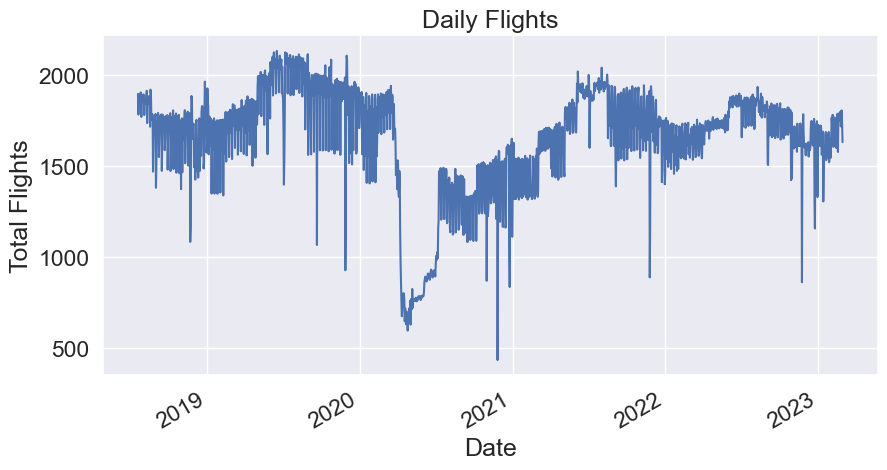

In [50]:
df['flights_total'].plot(
    title='Daily Flights',
    xlabel='Date',
    ylabel='Total Flights',
    figsize=(10, 5)
)

## Total flights by day for each month

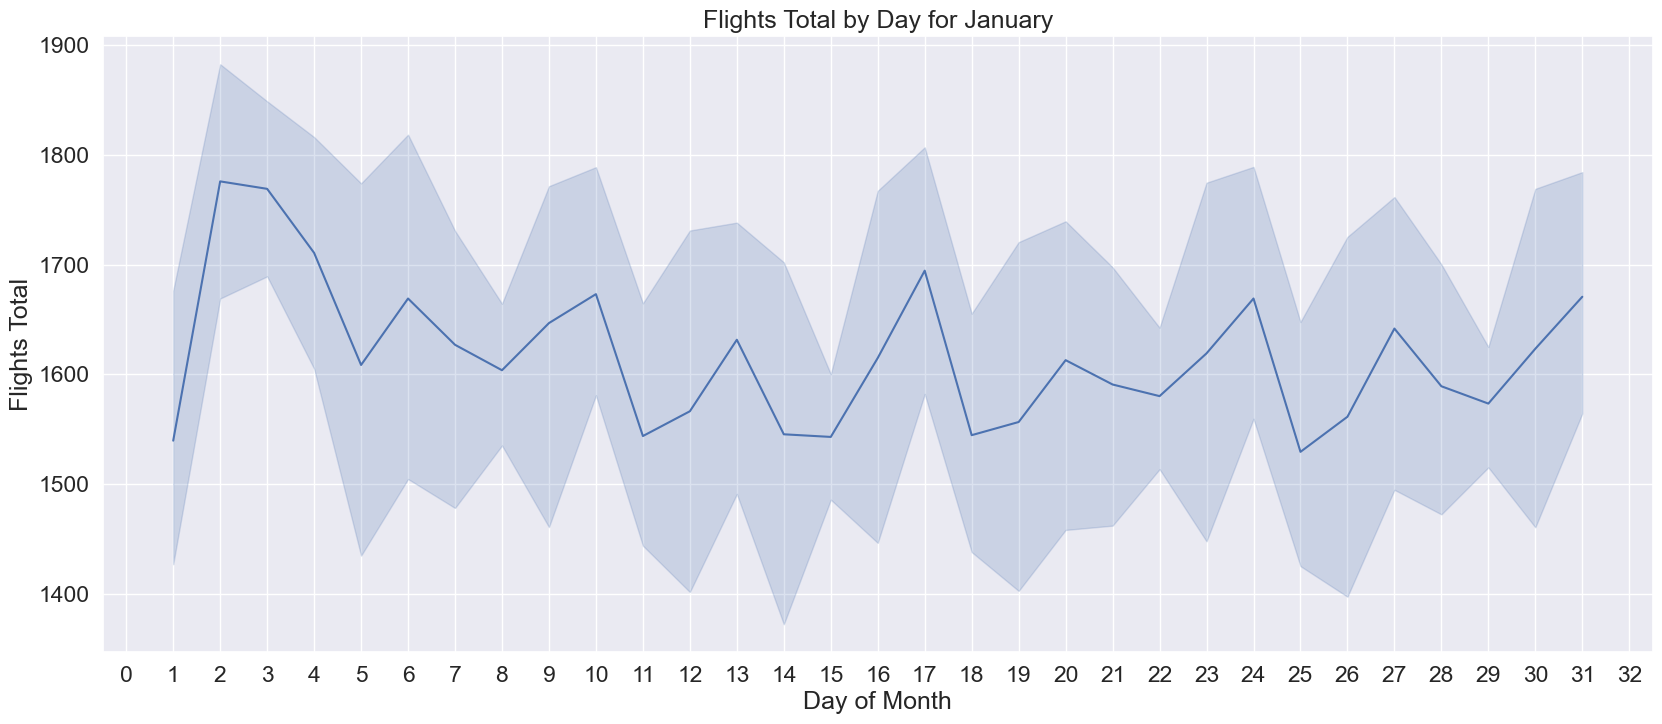

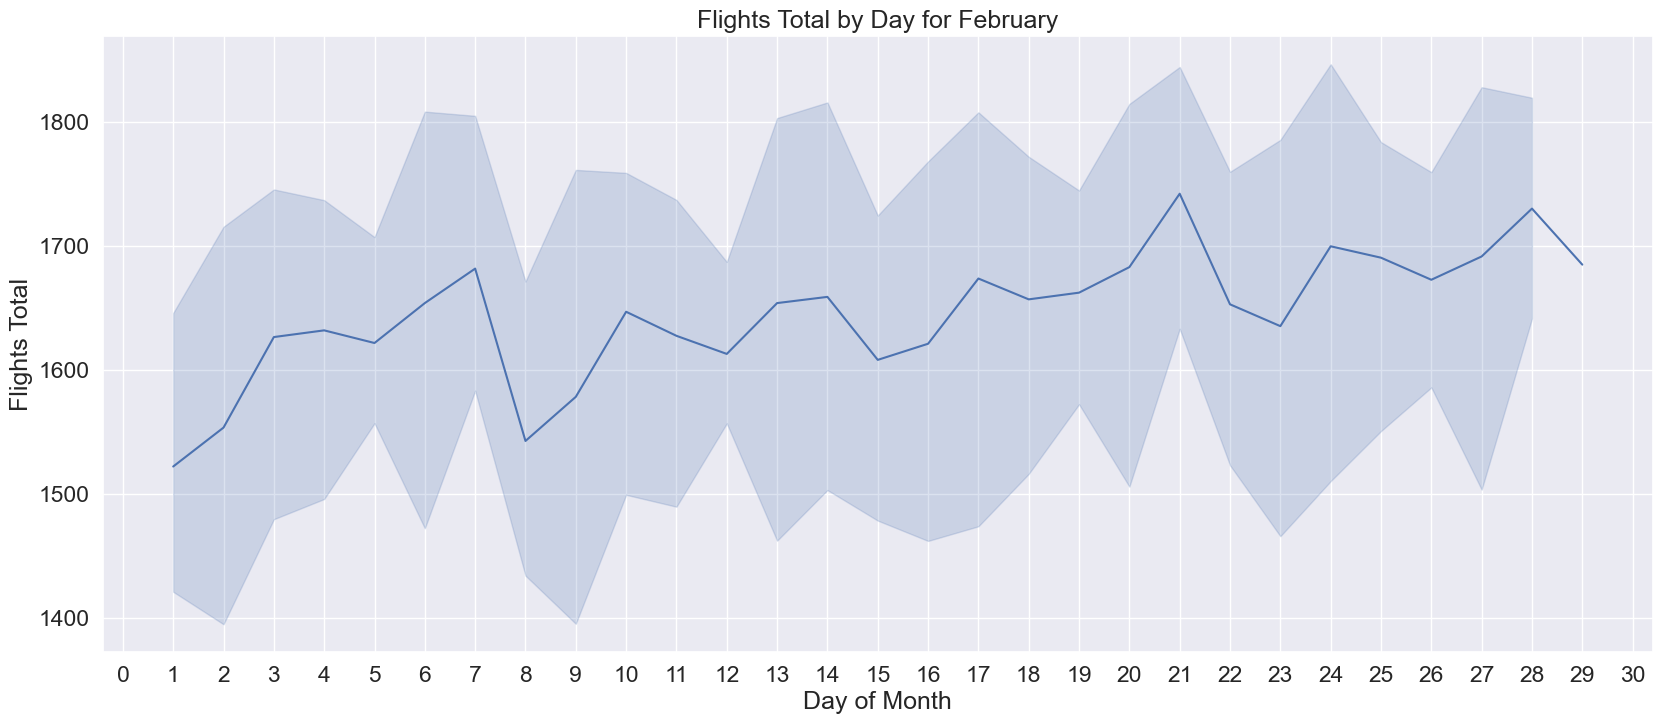

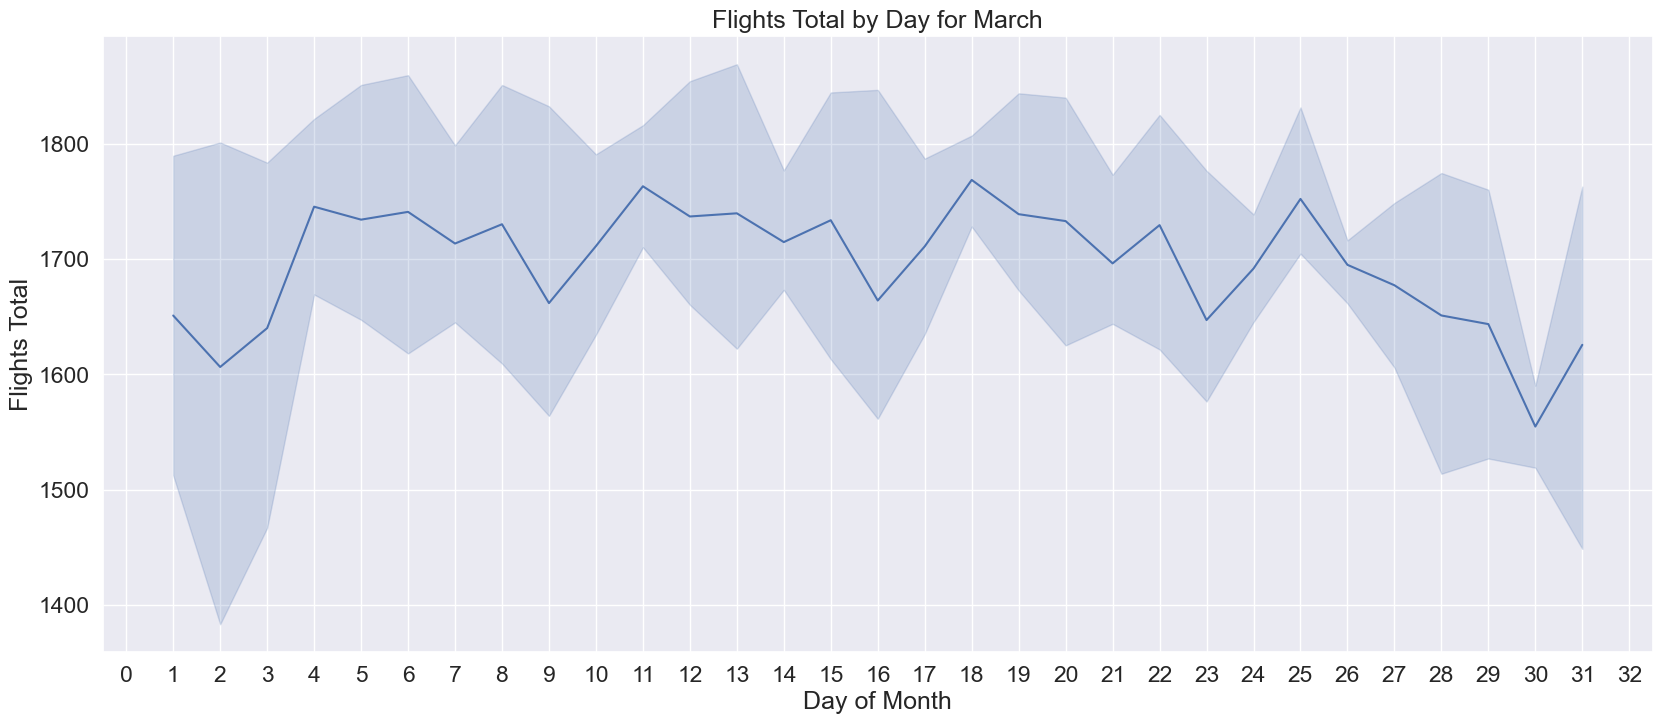

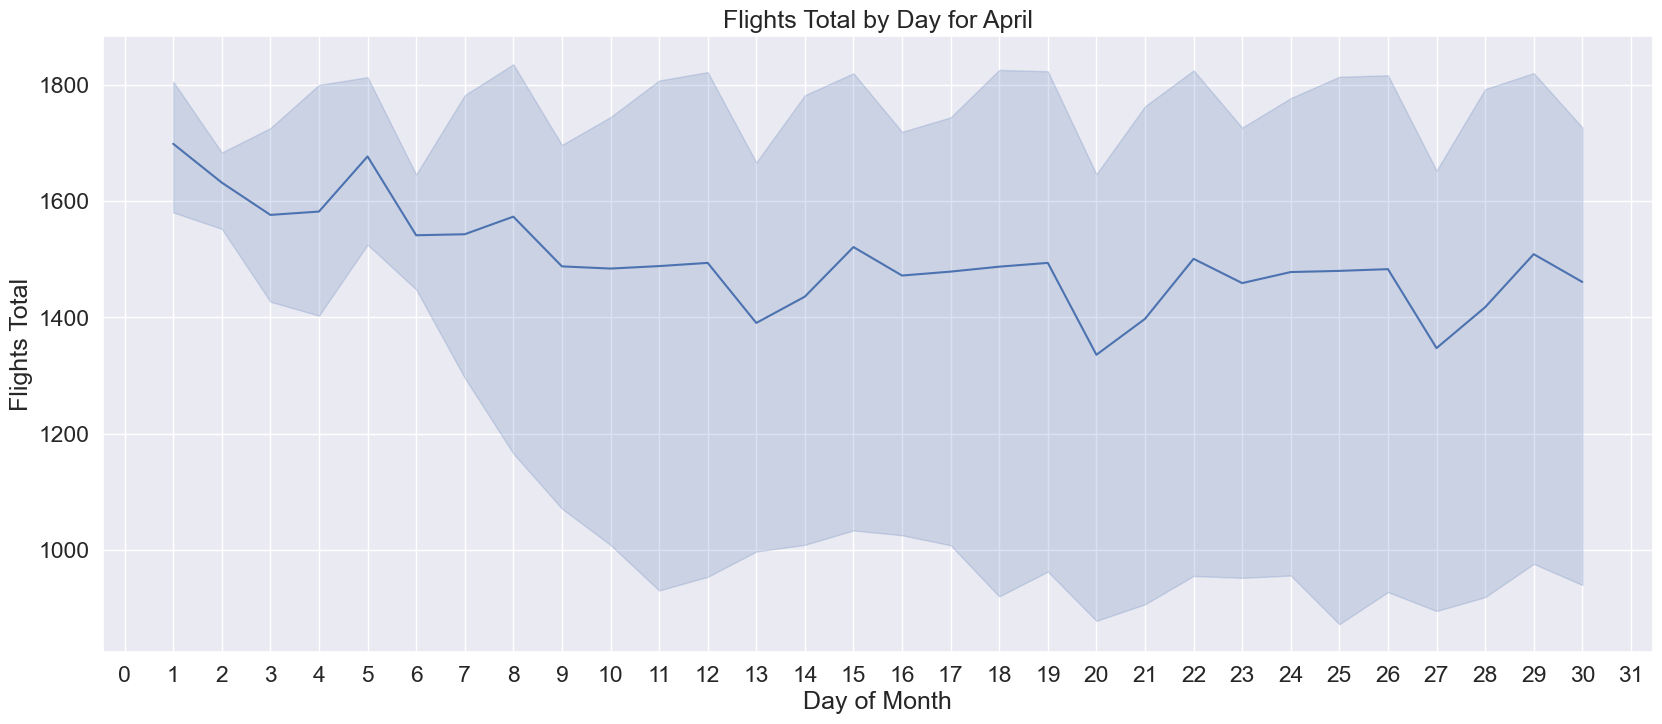

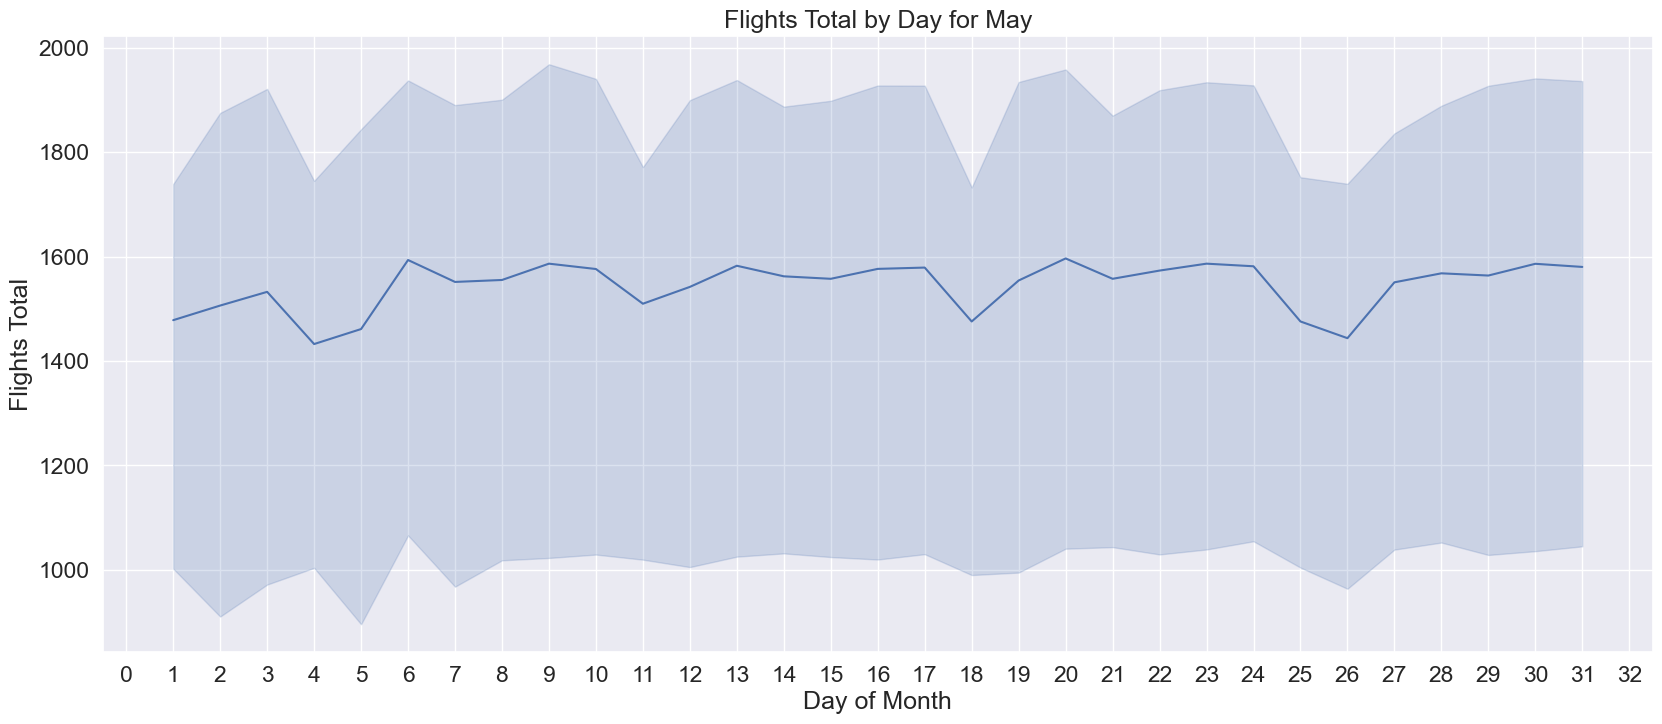

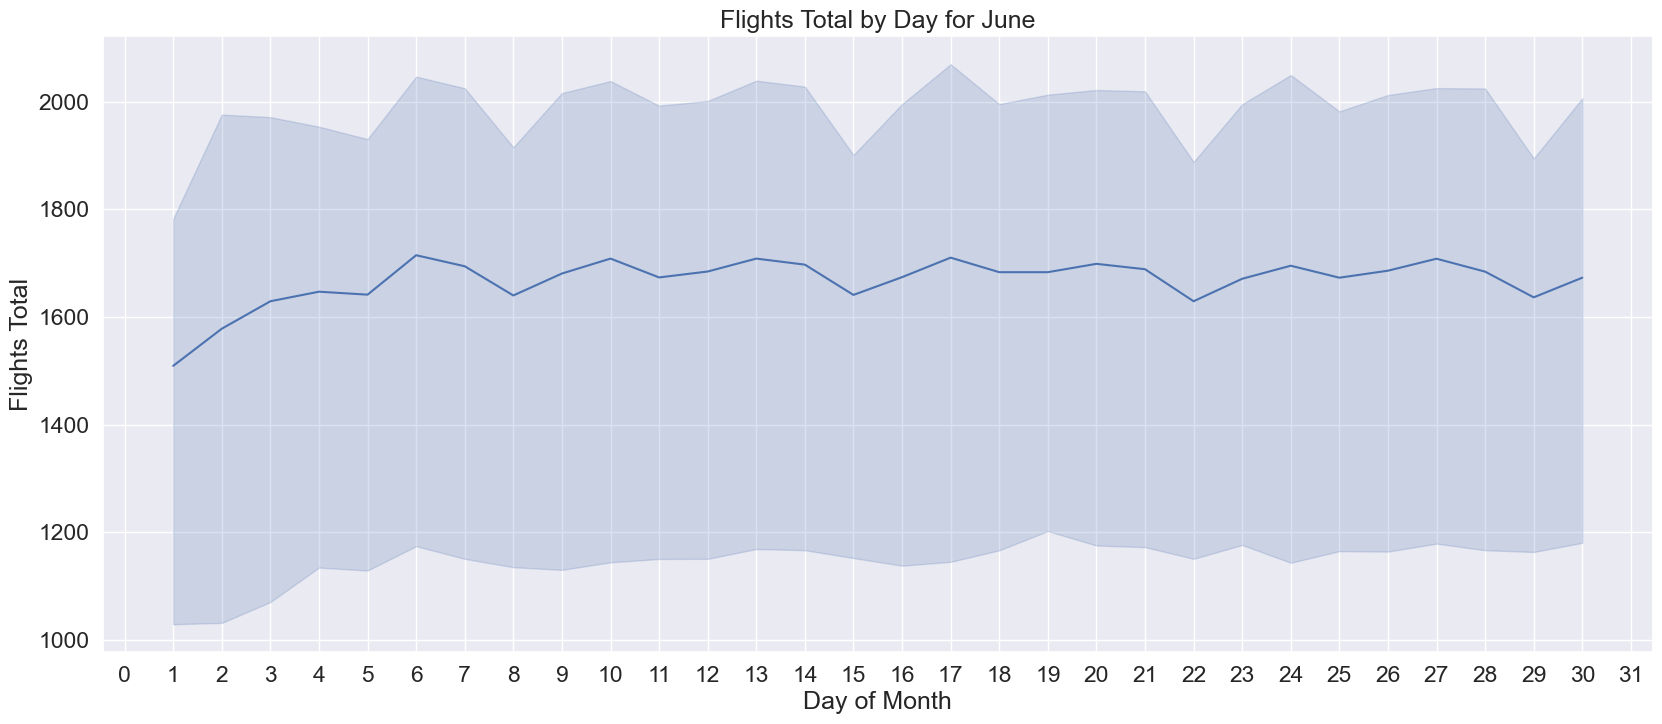

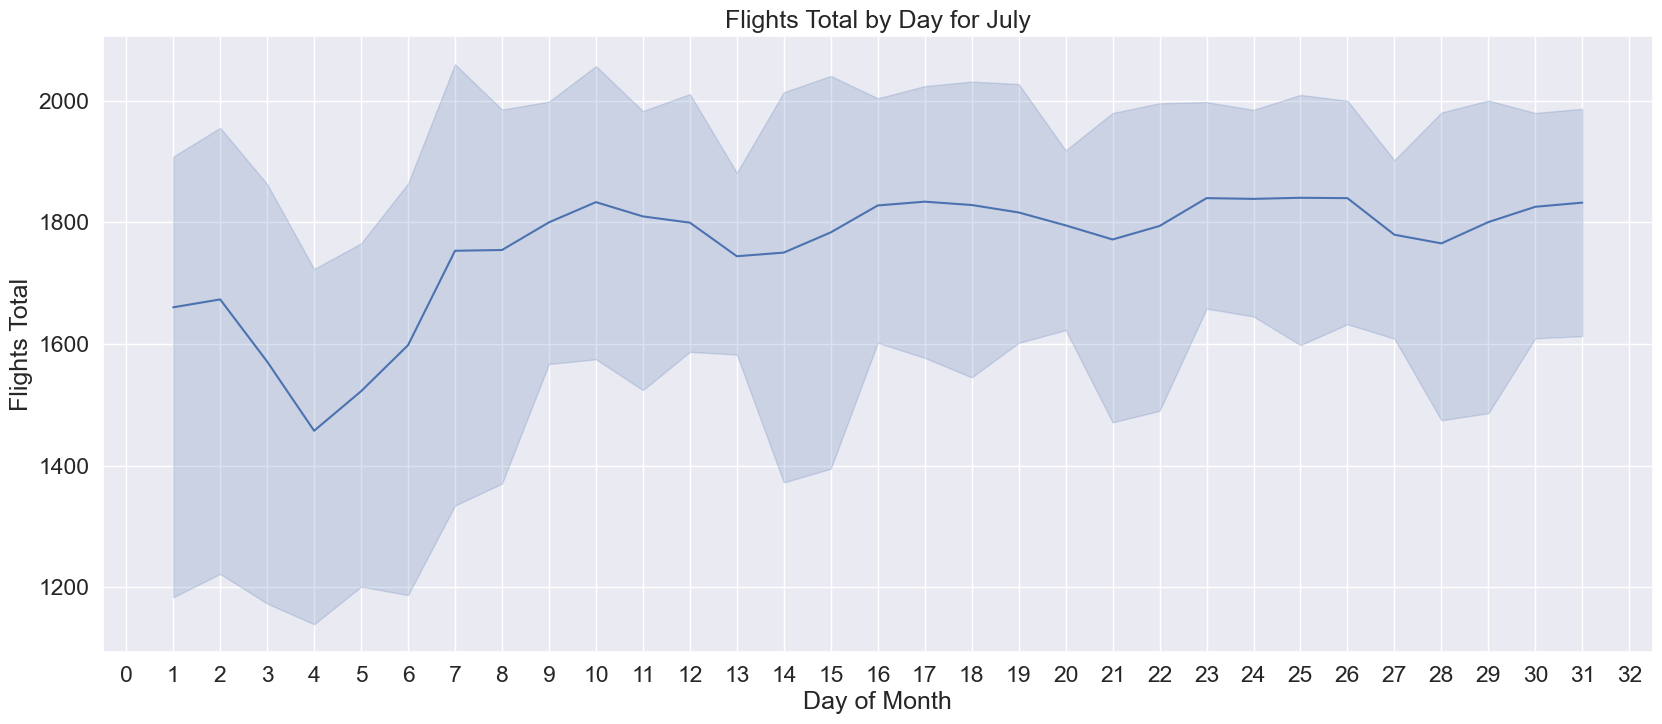

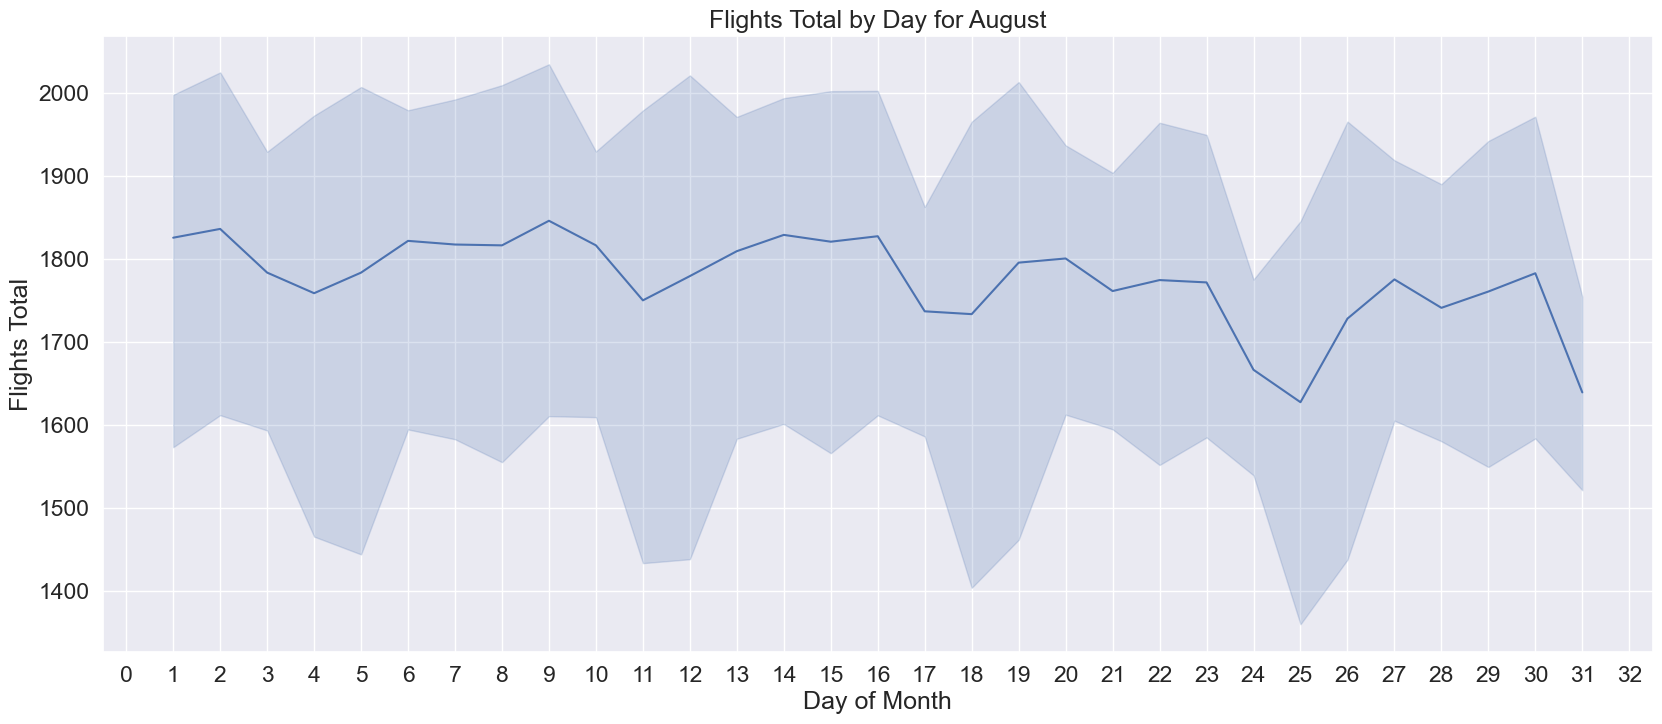

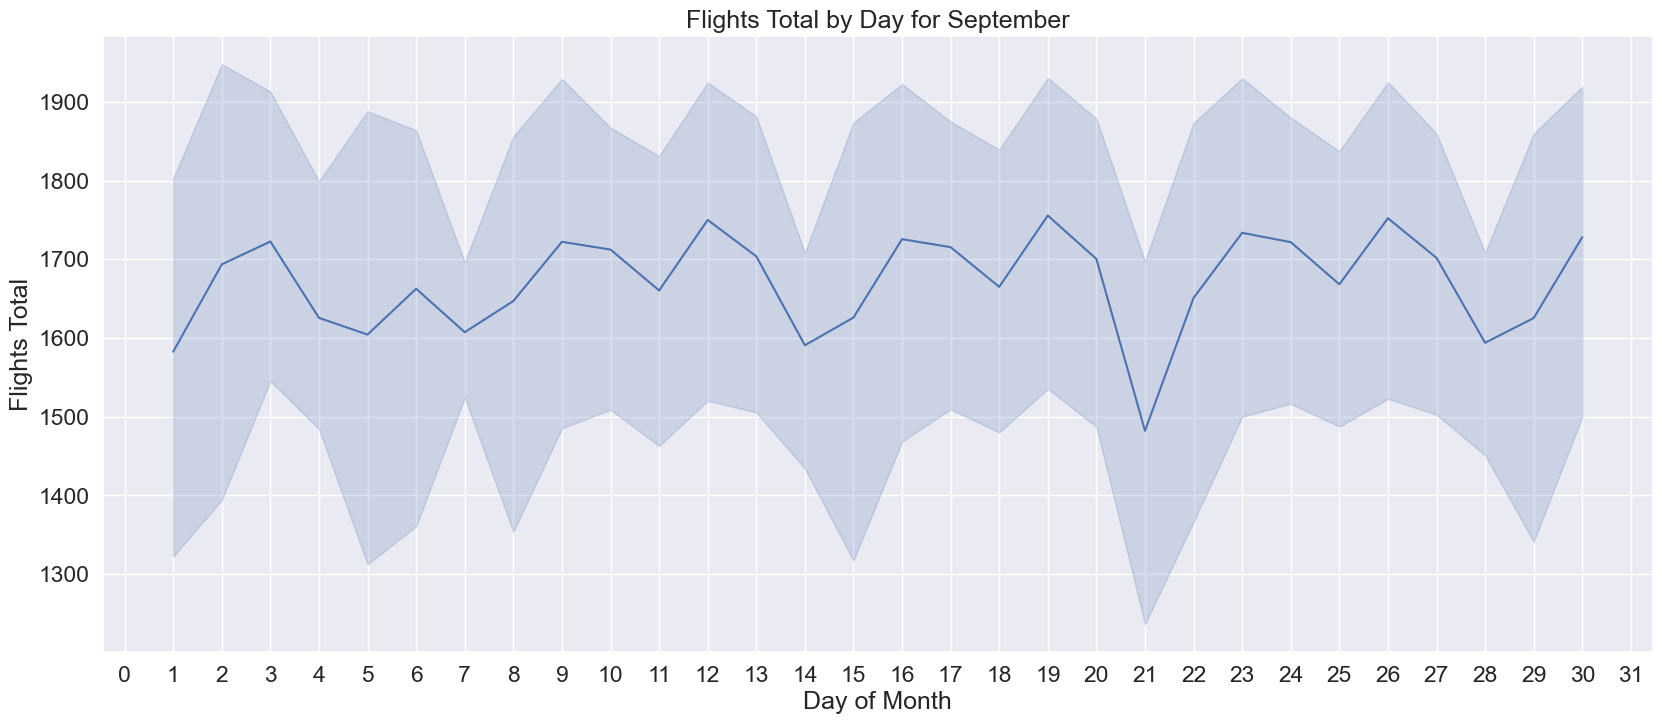

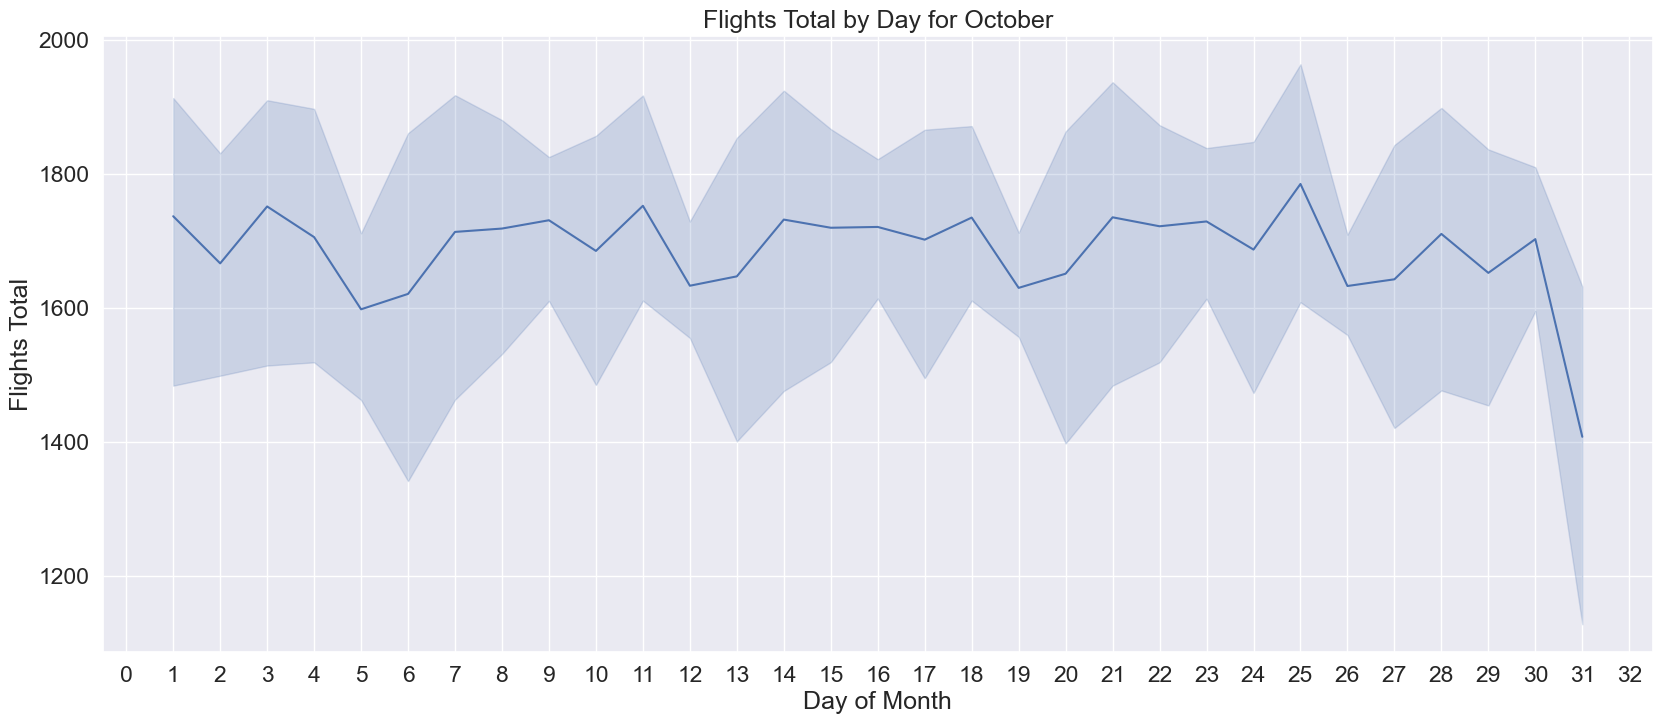

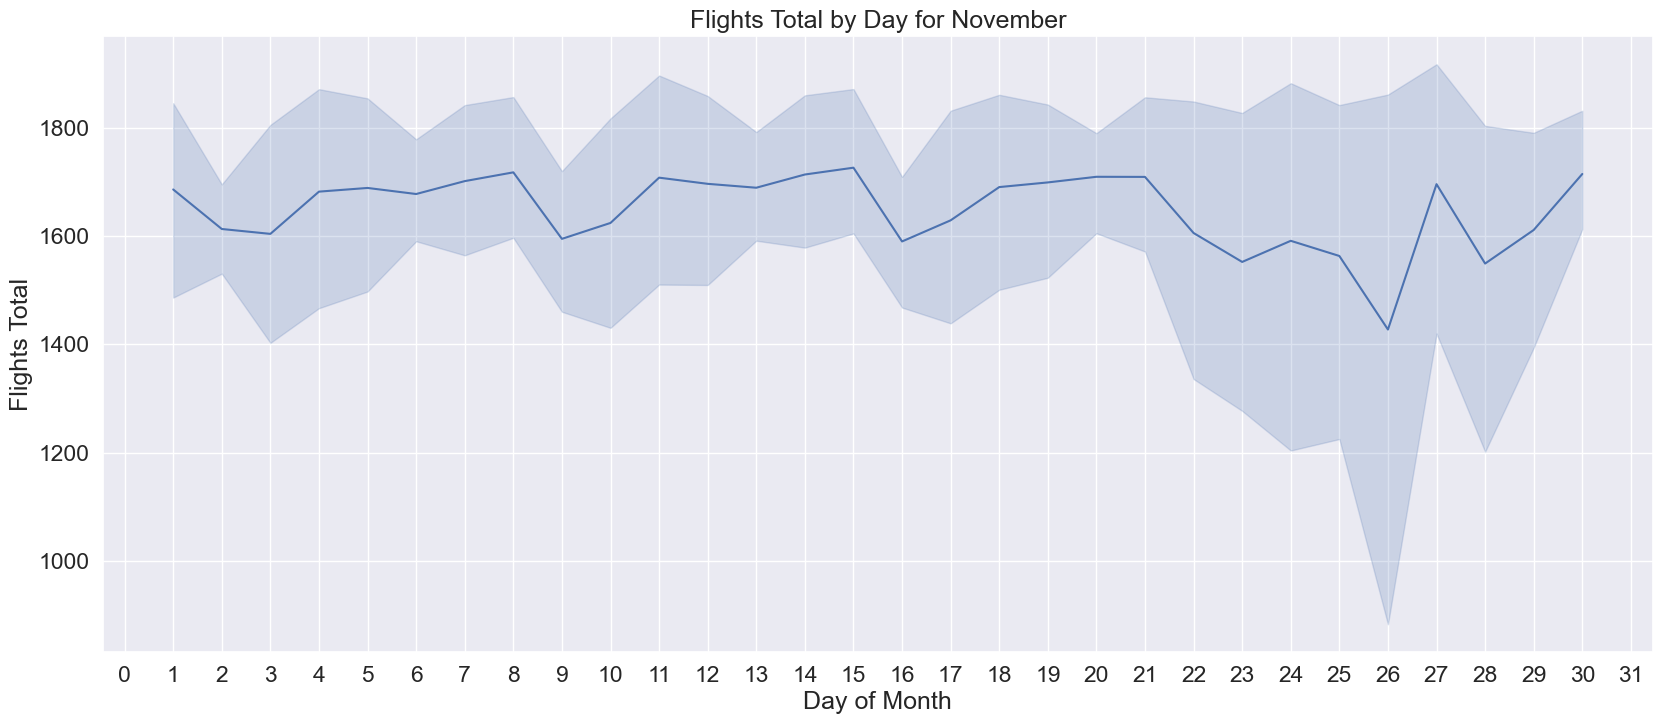

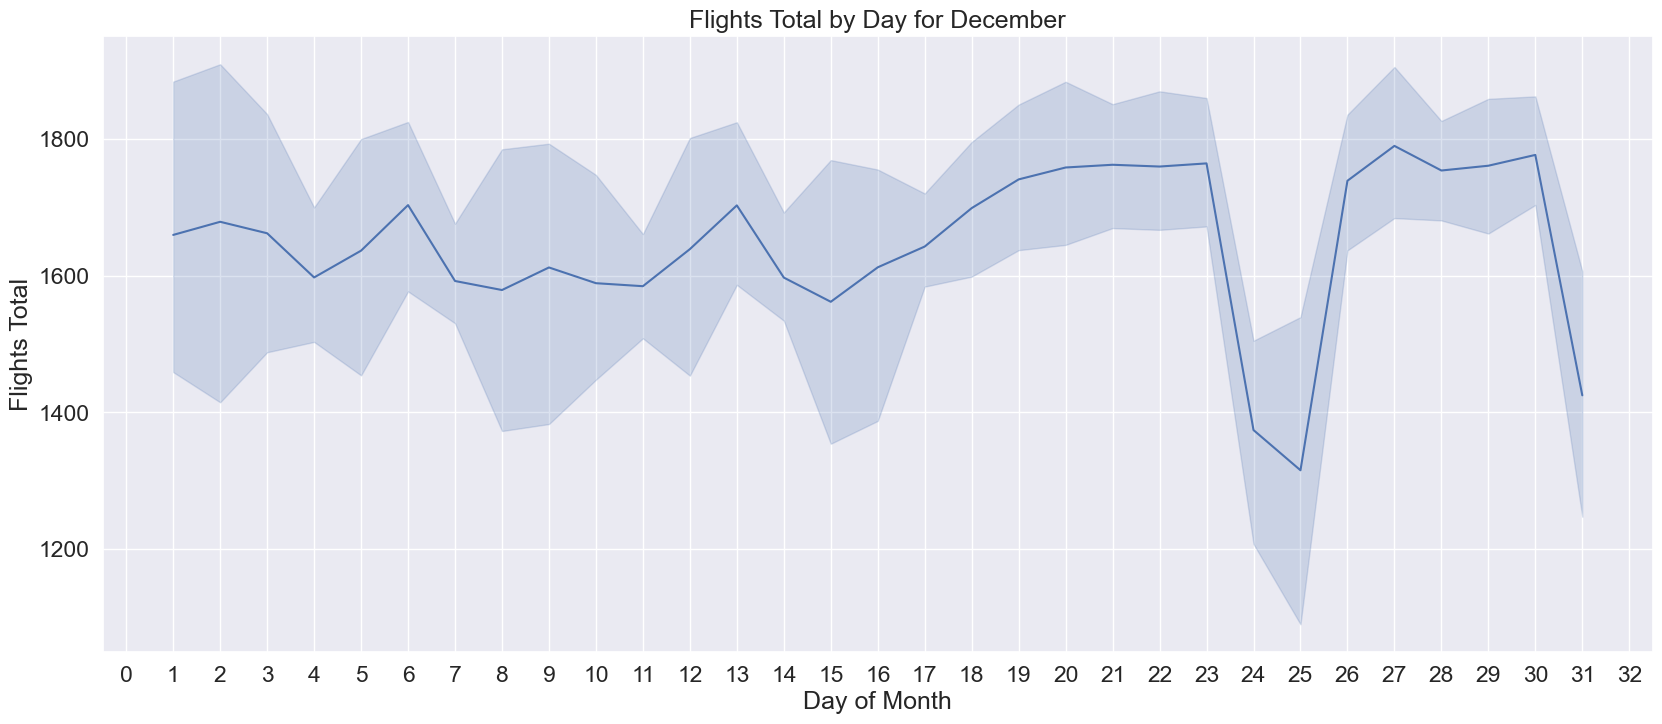

In [51]:

# Pointrange plot of the mean and standard deviation of flights_total by day for December
import matplotlib.ticker as ticker

for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    sns.set_theme(rc={'figure.figsize':(20,8)})
    sns.set_theme(font_scale=1.5)
    sns.lineplot(data=df[(df['month'] == month)], x="day_of_month", y="flights_total")
    plt.title(f'Flights Total by Day for {month}')
    plt.xlabel('Day of Month')
    plt.ylabel('Flights Total')
    # Setting x-axis major ticks to each day
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()


## Flights and weather correlations

In [53]:
weather_features = weather_cols + weather_cols_s2

# compute correlation matrix
correlations = df[['flights_total', 'flights_cancel', 'flights_delay', 'flights_ontime'] + weather_features].corr(method='pearson')

# Extract correlations for differrent flight features
weather_cols_total_corr = correlations.loc[weather_features, 'flights_total'].sort_values(ascending=False)
weather_cols_cancel_corr = correlations.loc[weather_features, 'flights_cancel'].sort_values(ascending=False)
weather_cols_delay_corr = correlations.loc[weather_features, 'flights_delay'].sort_values(ascending=False)
weather_cols_ontime_corr = correlations.loc[weather_features, 'flights_ontime'].sort_values(ascending=False)


# Combine the correlations into one dataframe
weather_cols_corr = pd.DataFrame({
    'Total Flights': weather_cols_total_corr,
    'Cancelled Flights': weather_cols_cancel_corr,
    'Delayed Flights': weather_cols_delay_corr,
    'On-time Flights': weather_cols_ontime_corr
})

print(weather_cols_corr)

# Get the average absolute value of the correlation coefficients for each column in descending order
average_correlations = weather_cols_corr.abs().mean(axis=1).sort_values(ascending=False)
print("\nAverage absolute value correlation with flight features:\n", average_correlations)


                       Total Flights  Cancelled Flights  Delayed Flights  On-time Flights
wx_apcp                     0.014920           0.180397         0.352477        -0.293975
wx_apcp_s2                  0.002956           0.090313         0.207114        -0.172133
wx_asnow                   -0.045981           0.457329        -0.009727        -0.229092
wx_asnow_s2                -0.036520           0.396208        -0.007313        -0.195861
wx_cape                     0.077603           0.067706         0.240532        -0.109500
wx_cape_s2                 -0.010638           0.099394         0.173521        -0.167290
wx_frozr                   -0.027864           0.398705        -0.015150        -0.182922
wx_frozr_s2                -0.004206           0.299456        -0.017613        -0.116323
wx_gust                    -0.049568           0.085428         0.162946        -0.193866
wx_gust_s2                 -0.027632           0.036852         0.084976        -0.099722
wx_lftx   

## Correlation pairplot for weather and delayed departures

<Figure size 1000x1000 with 0 Axes>

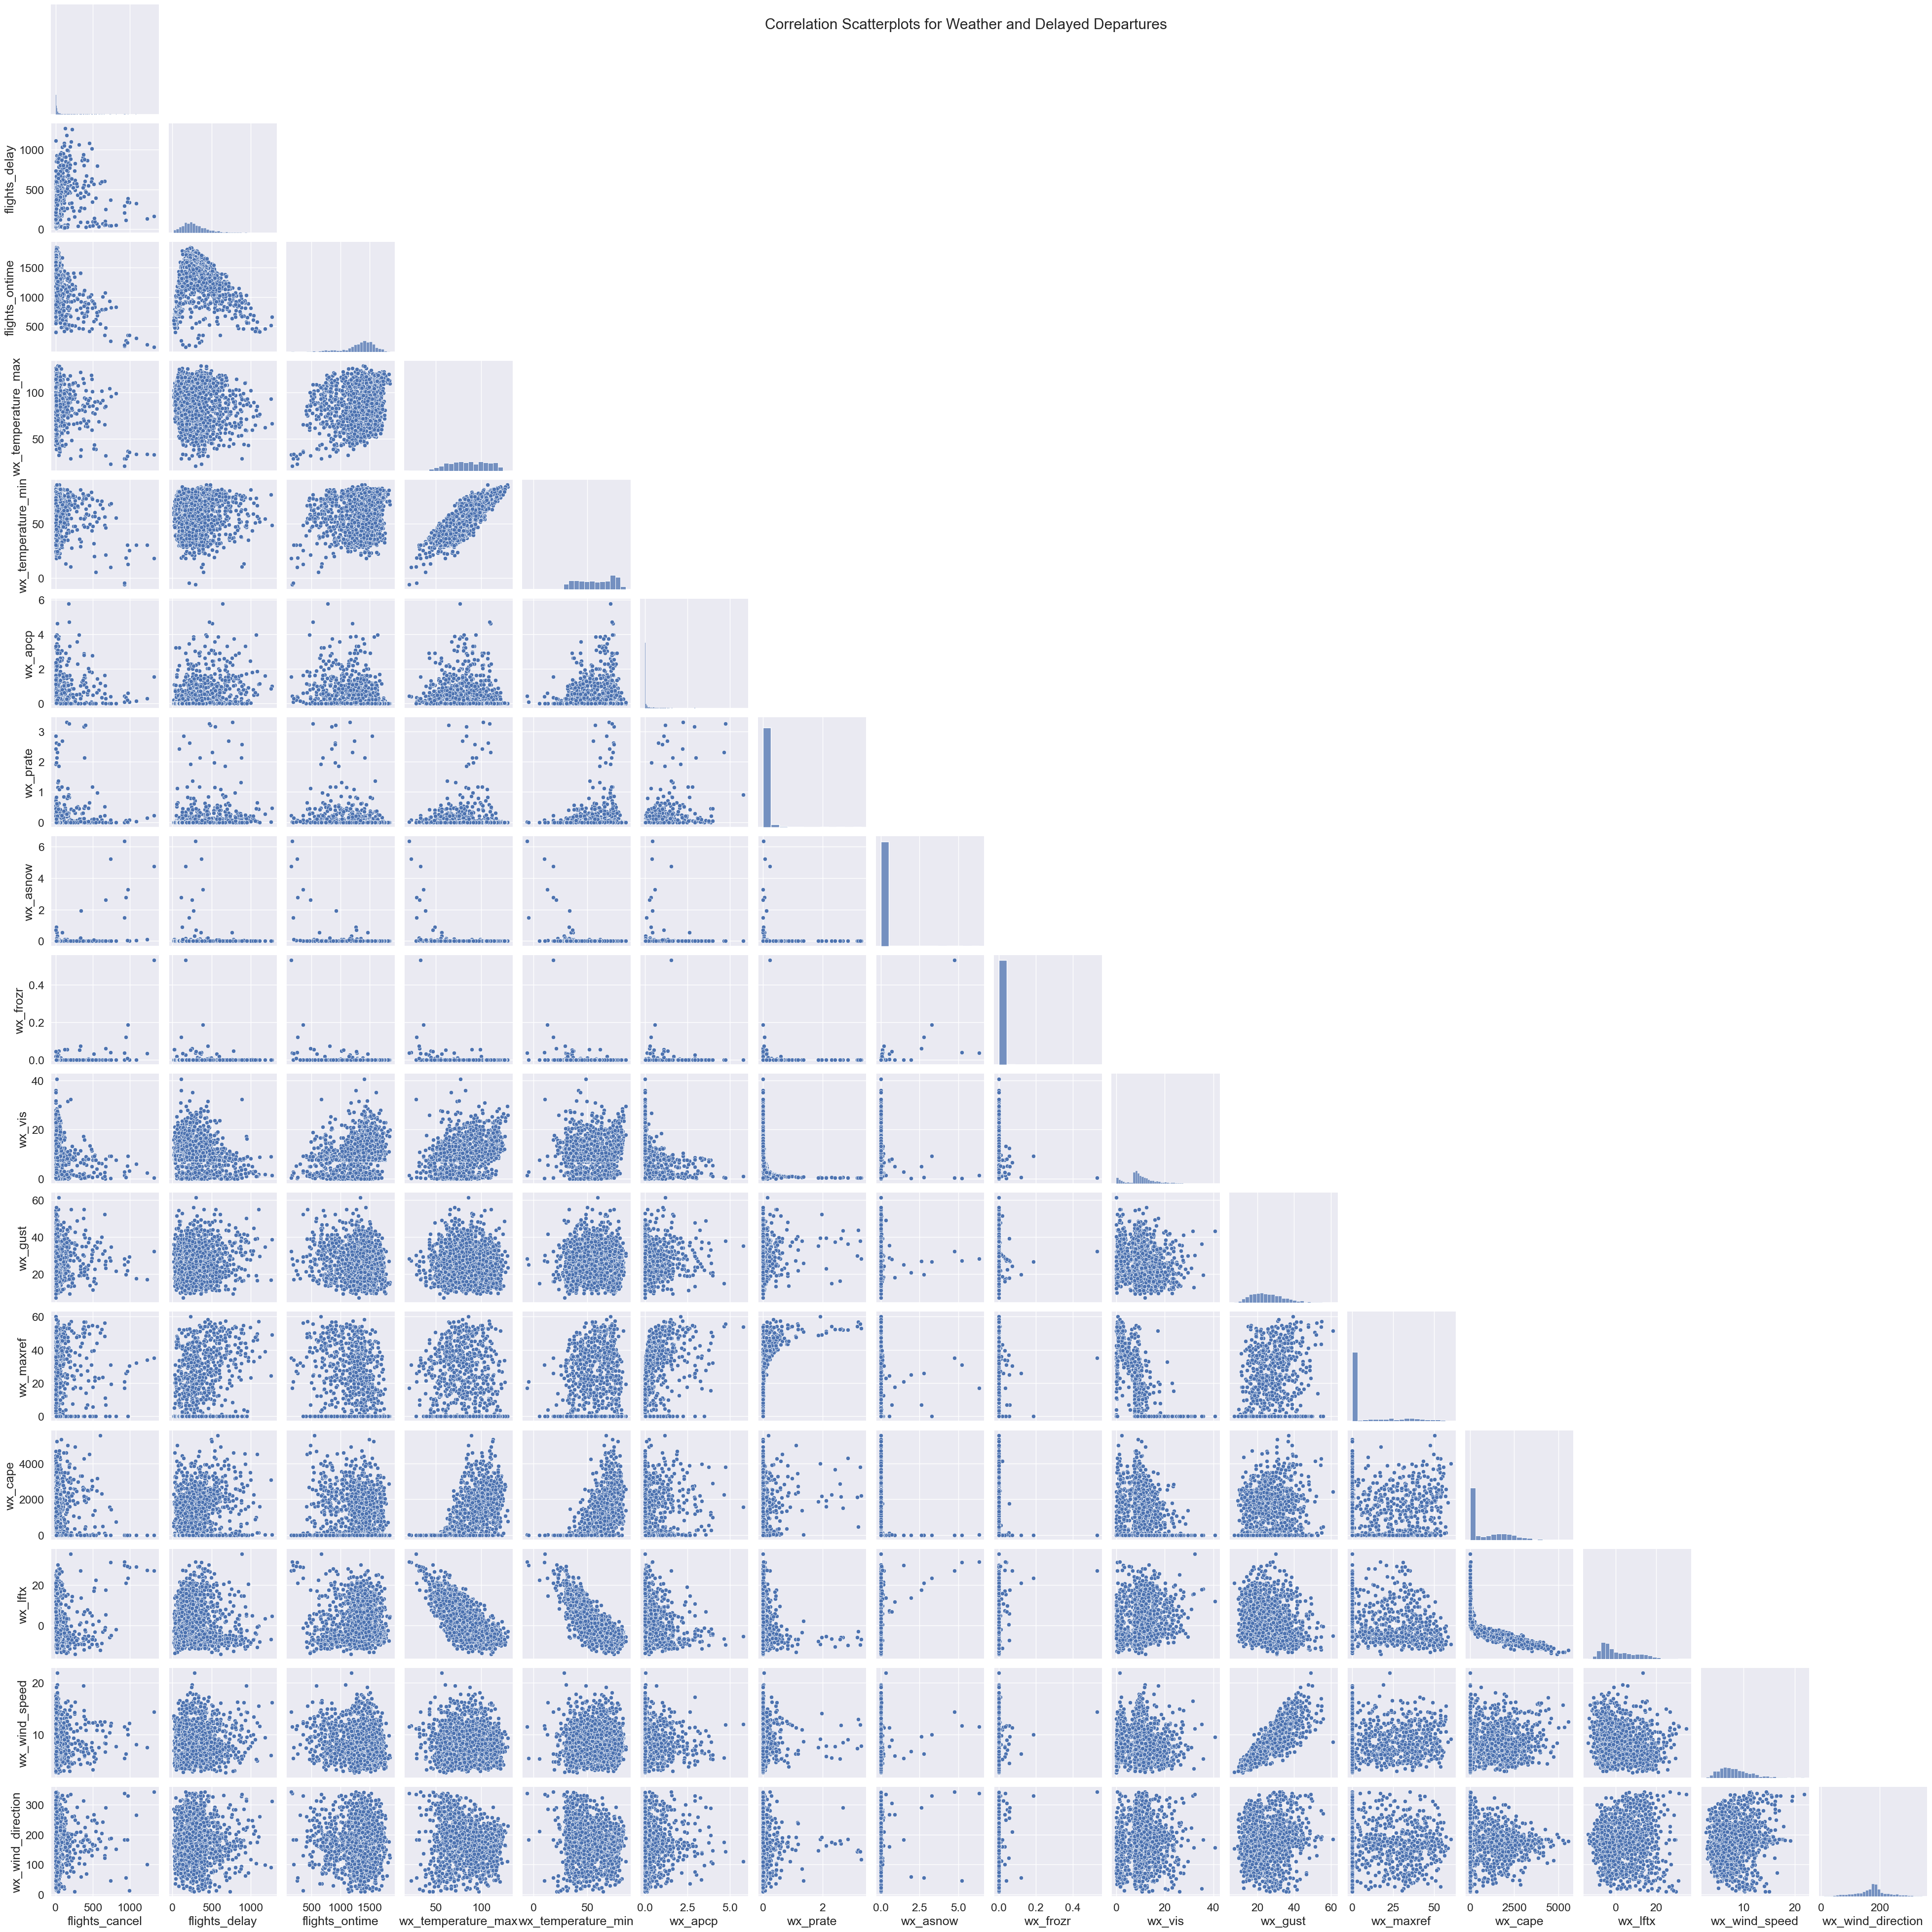

In [54]:
plt.figure(figsize=(10, 10))
sns.pairplot(df[['flights_cancel', 'flights_delay', 'flights_ontime'] + weather_cols], corner=True)
plt.suptitle('Correlation Scatterplots for Weather and Delayed Departures')
plt.show()

## Heatmap of correlations for weather data

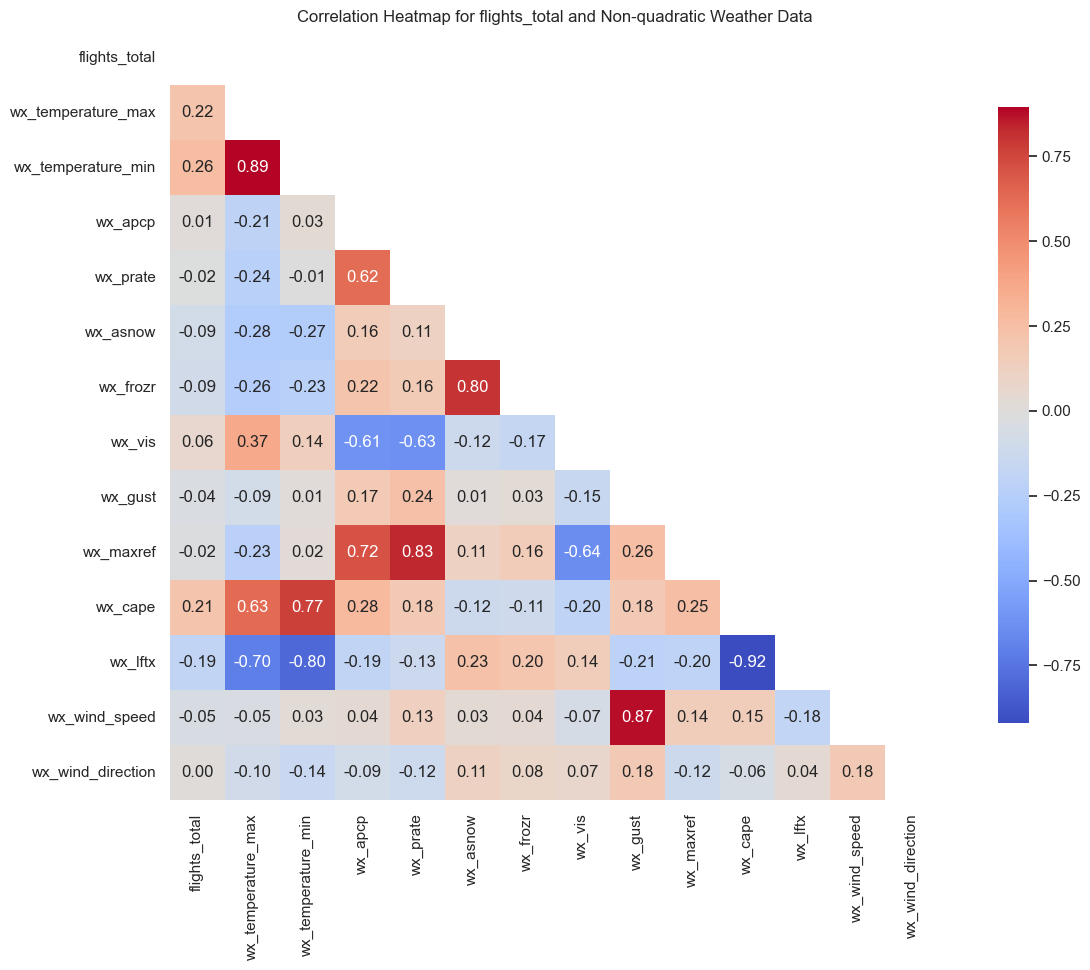

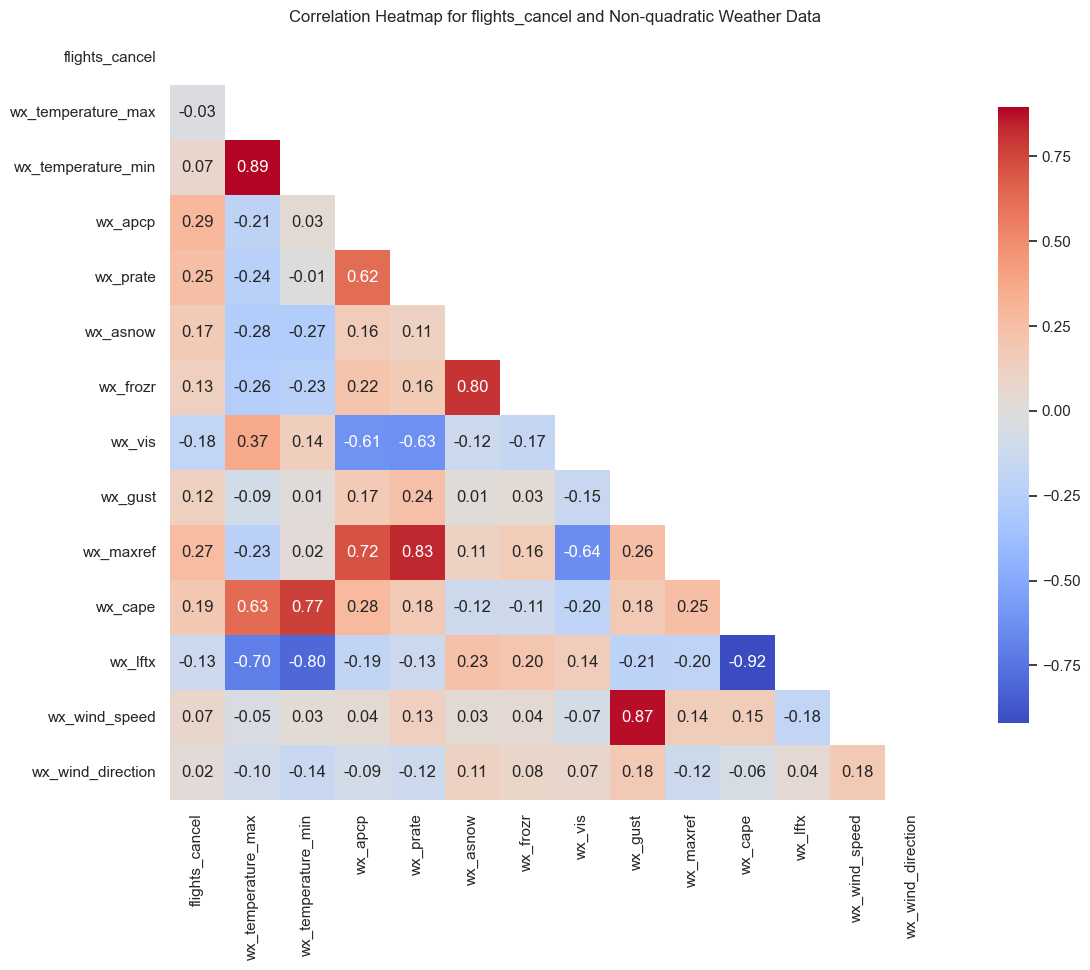

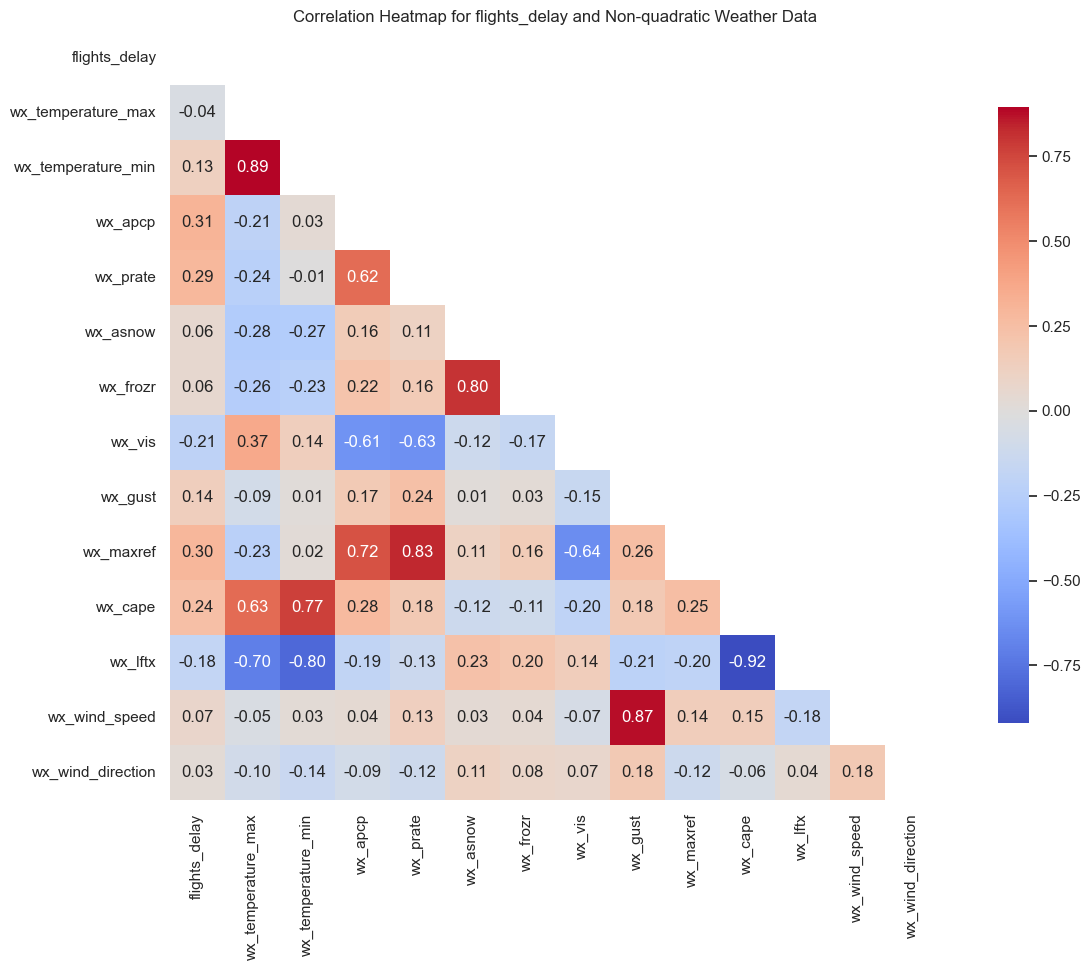

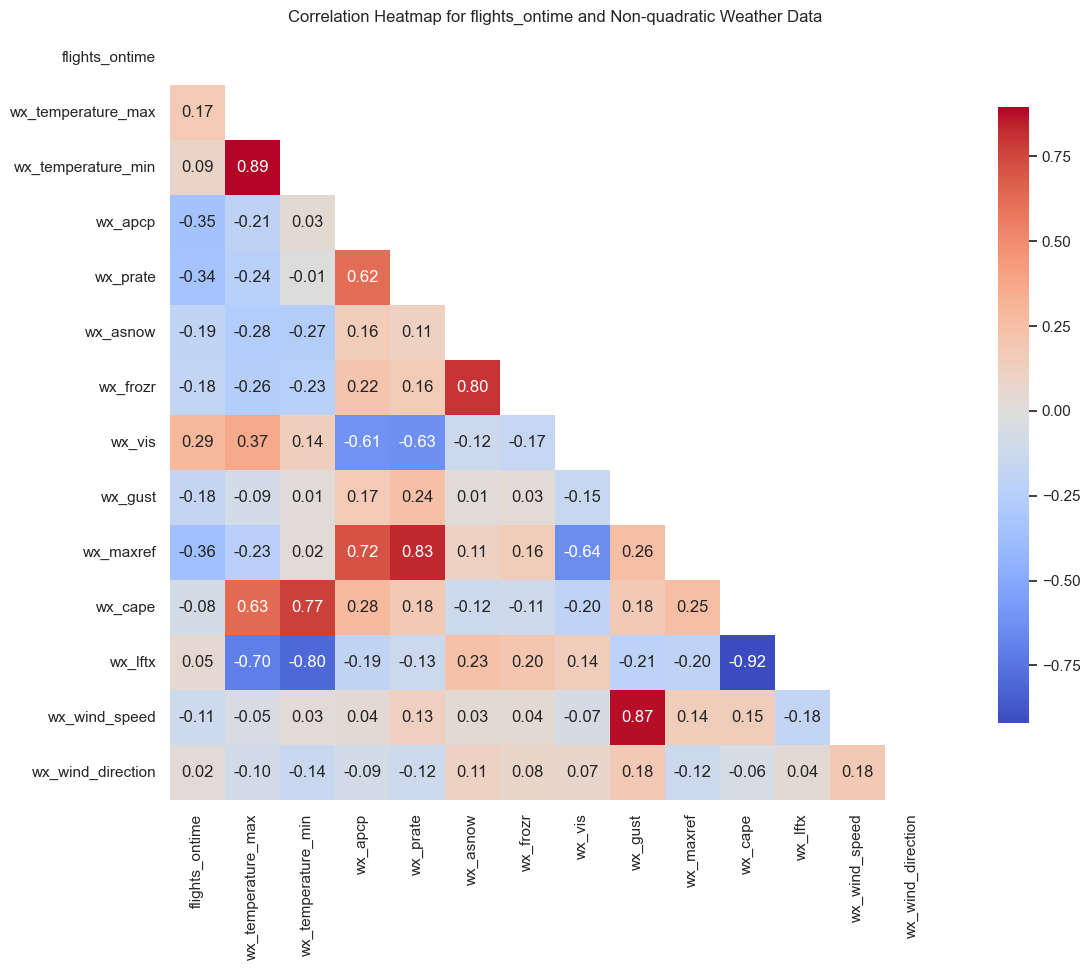

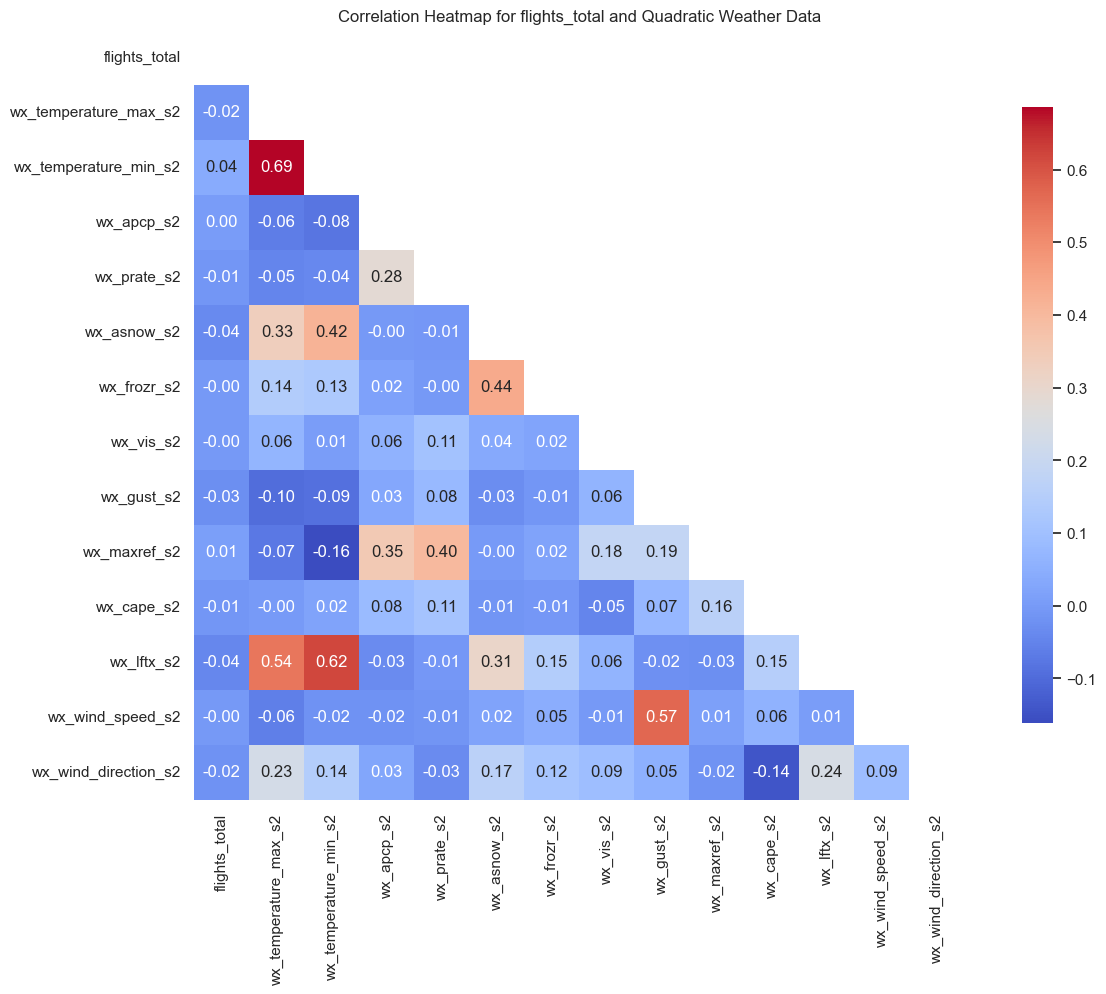

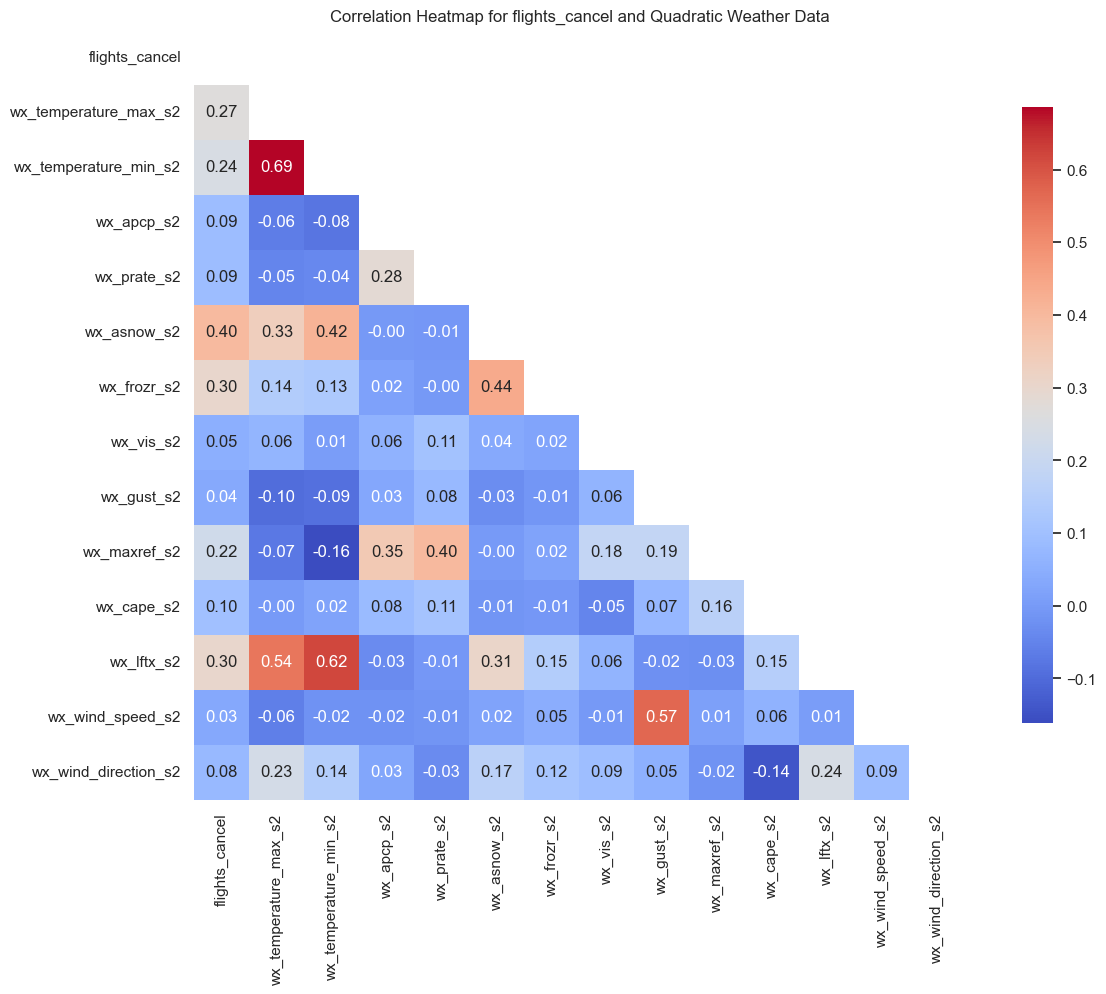

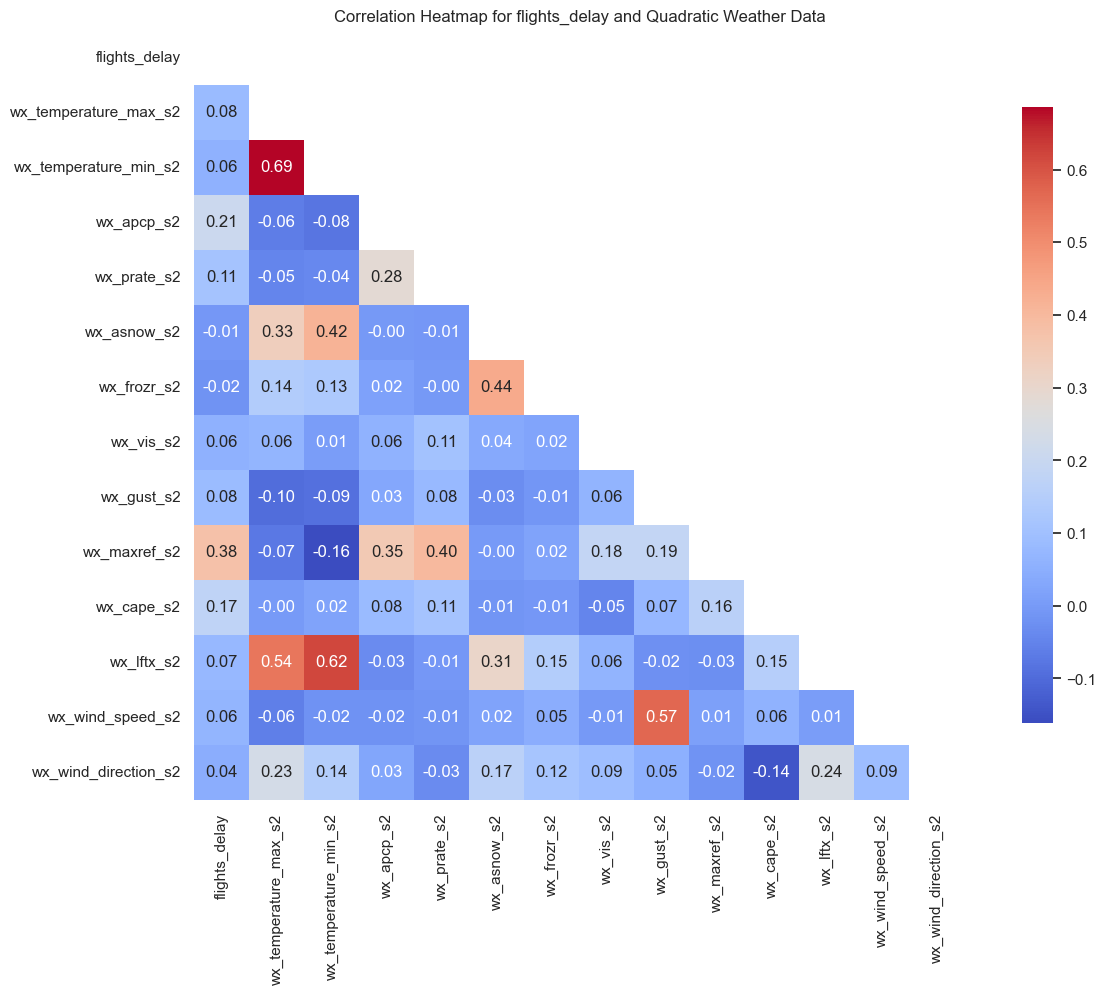

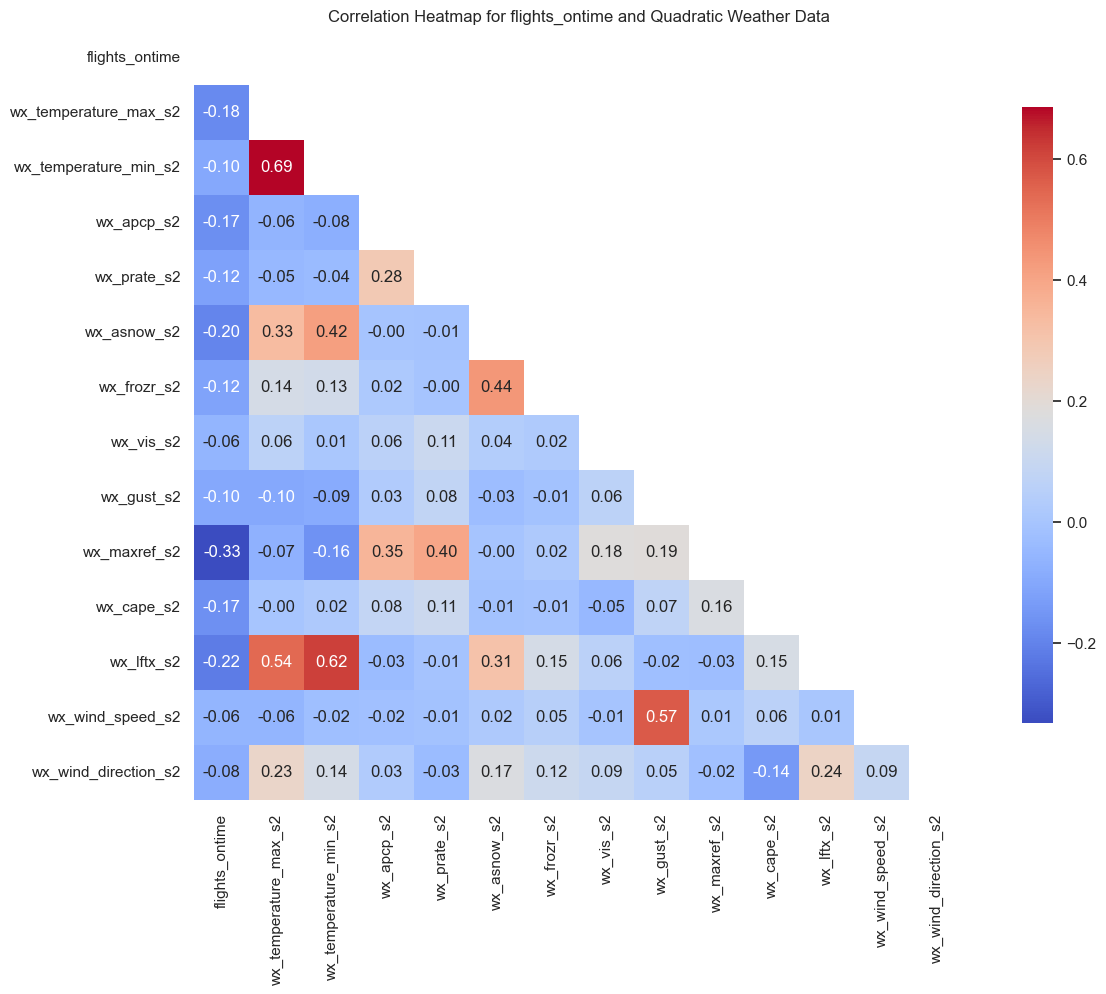

In [55]:
# setup a matplotlib figure with 8 subplots

corr_matrix = df[['flights_total'] + weather_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.rcParams['figure.figsize'] = [15, 10]
sns.set_theme(style='white', font_scale=1.0)

# Spearman correlation heatmaps with non-quadratic weather features
for feature in ['flights_total', 'flights_cancel', 'flights_delay', 'flights_ontime']:
    corr_matrix = df[[feature] + weather_cols].corr(method='spearman')
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Heatmap for {feature} and Non-quadratic Weather Data')
    plt.show()

# Pearson correlation heatmaps with quadratic weather features
for feature in ['flights_total', 'flights_cancel', 'flights_delay', 'flights_ontime']:
    corr_matrix = df[[feature] + weather_cols_s2].corr(method='pearson')
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Heatmap for {feature} and Quadratic Weather Data')
    plt.show()